In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.animation as animation 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation

from matplotlib import rc
from IPython.display import HTML

rc('animation', html='html5')
rc("font", weight="bold"); rc("font", size="20")
rc("axes"); rc("axes",labelsize="20"); rc("xtick",labelsize="20"); rc("ytick",labelsize="20")
rc("axes", labelweight="bold")
#plt.rcParams['text.usetex']=True

In [2]:
def generate_specific_rows(filePath, row_indices=[]):
    with open(filePath) as f:
        # using enumerate to track line no.
        for i, line in enumerate(f):
            #if line no. is in the row index list, then return that line
            if i in row_indices:
                yield line

## Plummer Sphere

### [Initial conditions]

In [3]:
plumsphr_ic = np.loadtxt('./output/PlummerSphereinitial.dat', unpack=True)
plumsphr_fnl = np.loadtxt('./output/PlummerSpherefinal.dat', unpack=True)

N = len(plumsphr_ic[0]); print(N)

4096


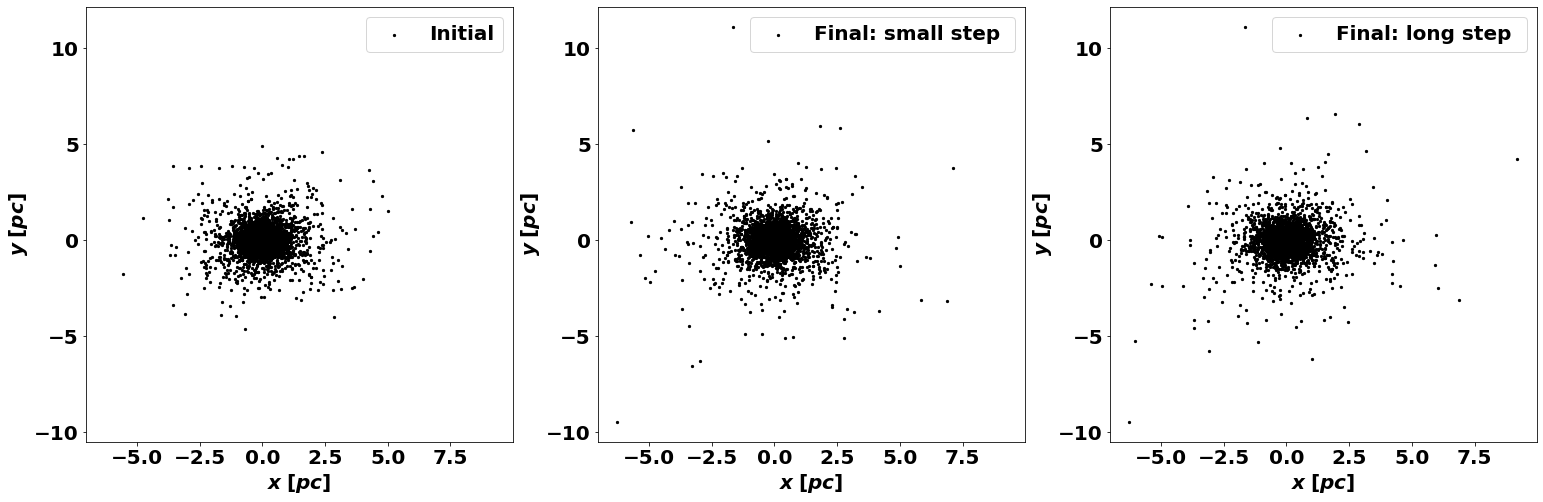

In [24]:
## 2d 
fig = plt.figure(figsize=(26,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2, sharey=ax1, sharex=ax1)
ax3 = fig.add_subplot(1,3,3, sharey=ax1, sharex=ax1)

ax1.scatter(plumsphr_ic[0], plumsphr_ic[1], s=5, color='black', label='Initial')
ax2.scatter(plumsphr_fnl[0], plumsphr_fnl[1], s=5, color='black', label='Final: small step ')
ax3.scatter(plumsphr_fnl[3], plumsphr_fnl[4], s=5, color='black', label='Final: long step ')

ax1.set_xlabel(r'$x\; [pc]$')
ax1.set_ylabel(r'$y\; [pc]$')

ax2.set_xlabel(r'$x\; [pc]$')
ax2.set_ylabel(r'$y\; [pc]$')

ax3.set_xlabel(r'$x\; [pc]$')
ax3.set_ylabel(r'$y\; [pc]$')

ax1.legend(); ax2.legend(); ax3.legend()
plt.savefig('./Plots/plummer.png')

#ax.axis('off')
plt.show()

In [ ]:
## 3d
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(projection='3d')
ax.scatter(plumsphr_fnl[0], plumsphr_fnl[1], plumsphr_fnl[2], s=2, color='black')
#ax.axis('off')
plt.show()

### [Particle Trajectory]

In [11]:
Tstps = 1000; pN = 10
row_indices_p1 = np.arange(0, Tstps*pN, pN)
row_indices_p2 = np.arange(1, Tstps*pN, pN)
row_indices_p3 = np.arange(2, Tstps*pN, pN)
row_indices_p4 = np.arange(3, Tstps*pN, pN)

In [12]:
gen_p1 = generate_specific_rows("./output/PlummerSpherePostime.dat", row_indices = row_indices_p1)
data_p1 = np.loadtxt(gen_p1, unpack=True, usecols=[0,1,2,3,4,5,6])
#print(data_p1[0])

In [13]:
gen_p2 = generate_specific_rows("./output/PlummerSpherePostime.dat", row_indices = row_indices_p2)
data_p2 = np.loadtxt(gen_p2, unpack=True, usecols=[0,1,2,3,4,5,6])
#print(data_p2[0])

In [14]:
gen_p3 = generate_specific_rows("./output/PlummerSpherePostime.dat", row_indices = row_indices_p3)
data_p3 = np.loadtxt(gen_p3, unpack=True, usecols=[0,1,2,3,4,5,6])

In [15]:
gen_p4 = generate_specific_rows("./output/PlummerSpherePostime.dat", row_indices = row_indices_p4)
data_p4 = np.loadtxt(gen_p4, unpack=True, usecols=[0,1,2,3,4,5,6])

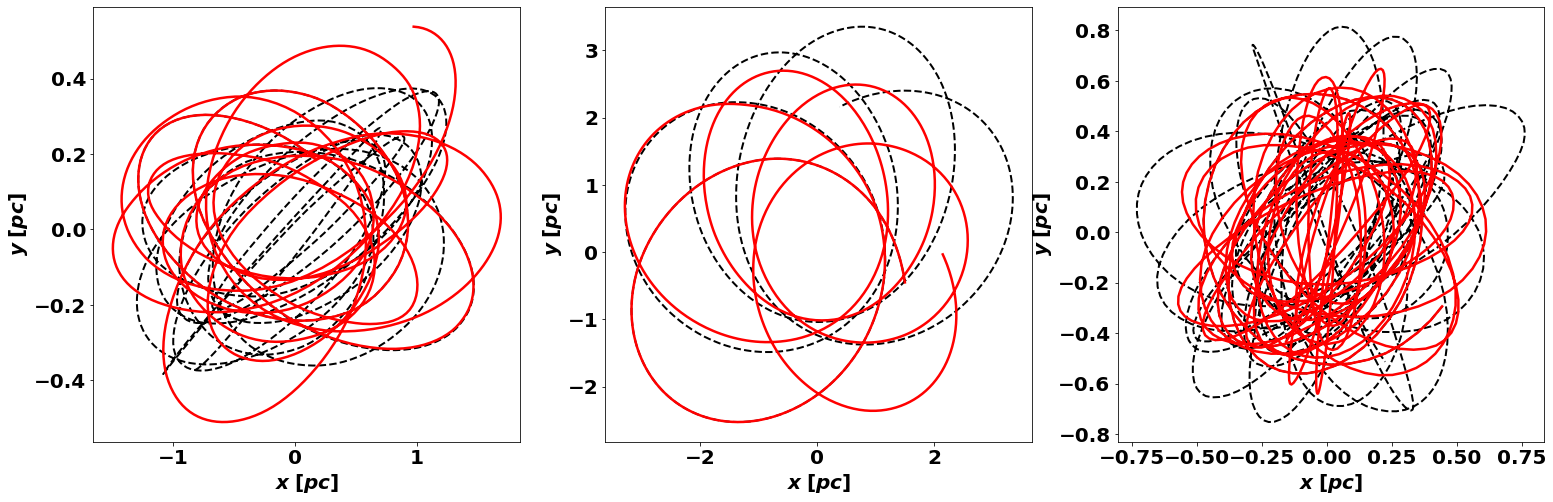

In [16]:
fig = plt.figure(figsize=(26,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.plot(data_p1[1],data_p1[2], color='black', ls='--', lw=2.0)
ax1.plot(data_p1[4],data_p1[5], color='red', ls='-', lw=2.5)

ax2.plot(data_p2[1],data_p2[2], color='black', ls='--', lw=2.0)
ax2.plot(data_p2[4],data_p2[5], color='red', ls='-', lw=2.5)

ax3.plot(data_p3[1],data_p3[2], color='black', ls='--', lw=2.0)
ax3.plot(data_p3[4],data_p3[5], color='red', ls='-', lw=2.5)

ax1.set_xlabel(r'$x\; [pc]$')
ax1.set_ylabel(r'$y\; [pc]$')

ax2.set_xlabel(r'$x\; [pc]$')
ax2.set_ylabel(r'$y\; [pc]$')

ax3.set_xlabel(r'$x\; [pc]$')
ax3.set_ylabel(r'$y\; [pc]$')
plt.savefig('./Plots/traj.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(projection='3d')
#ax.scatter(data_p1[1],data_p1[2], data_p1[3], s=2, color='black')
#ax.scatter(data_p2[1],data_p2[2], data_p2[3], s=2, color='black')
#ax.scatter(data_p3[1],data_p3[2], data_p3[3], s=2, color='black')

#ax.scatter(data_p1[4],data_p1[5], data_p1[6], s=2, color='red')
#ax.scatter(data_p2[4],data_p2[5], data_p2[6], s=2, color='red')
#ax.scatter(data_p3[4],data_p3[5], data_p3[6], s=2, color='red')

# ax.plot(data_p1[1],data_p1[2], data_p1[3], color='black')
# ax.plot(data_p1[4],data_p1[5], data_p1[6], color='red')

ax.plot(data_p2[1],data_p2[2], data_p2[3], color='black')
ax.plot(data_p2[4],data_p2[5], data_p2[6], color='red')

# ax.plot(data_p3[1],data_p3[2], data_p3[3], color='black')
# ax.plot(data_p3[4],data_p3[5], data_p3[6], color='red')

# ax.plot(data_p4[1],data_p4[2], data_p4[3], color='black')
# ax.plot(data_p4[4],data_p4[5], data_p4[6], color='red')


ax.axis('off')
plt.show()

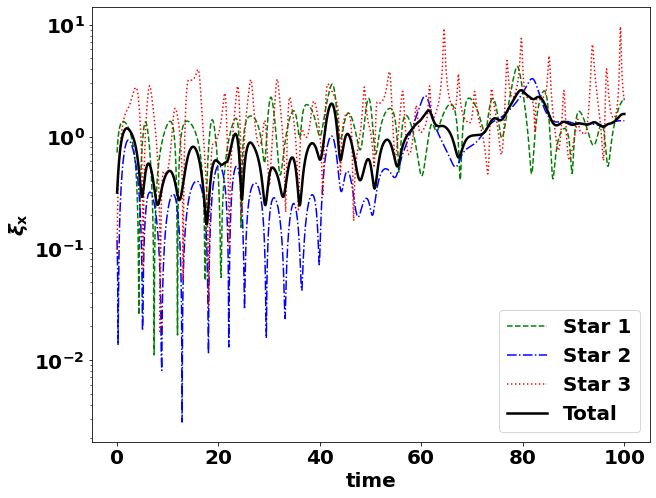

In [48]:
sgm_p1 = (data_p1[1] - data_p1[4])**2 + ( data_p1[2] - data_p1[5])**2+ (data_p1[3] - data_p1[6])**2
rd_p1 = (data_p1[1])**2 + ( data_p1[2])**2+ (data_p1[3])**2
sgm_p1_r = np.sqrt(sgm_p1/rd_p1)

sgm_p2 = (data_p2[1] - data_p2[4])**2 + ( data_p2[2] - data_p2[5])**2+ (data_p2[3] - data_p2[6])**2
rd_p2 = (data_p2[1])**2 + ( data_p2[2])**2+ (data_p2[3])**2
sgm_p2_r = np.sqrt(sgm_p2/rd_p2)

sgm_p3 = (data_p3[1] - data_p3[4])**2 + ( data_p3[2] - data_p3[5])**2+ (data_p3[3] - data_p3[6])**2
rd_p3 = (data_p3[1])**2 + ( data_p3[2])**2+ (data_p3[3])**2
sgm_p3_r = np.sqrt(sgm_p3/rd_p3)

sgm_pt = np.sqrt((sgm_p1+sgm_p2+sgm_p3)/(rd_p1+rd_p2+rd_p3))

plt.figure(figsize=(10,8))
plt.plot(data_p1[0], sgm_p1_r, color='green', ls='--', label='Star 1', lw=1.5)
plt.plot(data_p2[0], sgm_p2_r, color='blue', ls='-.', label='Star 2', lw=1.5)
plt.plot(data_p3[0], sgm_p3_r, color='red', ls=':', label='Star 3', lw=1.5)
plt.plot(data_p3[0], sgm_pt, color='black', ls='-', label='Total', lw=2.5)
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel(r'$\xi_{\bf x}$')
plt.yscale('log')
plt.savefig('./Plots/Error_trj_cmp.png')
plt.show()

### [Particle Trajectory animation]

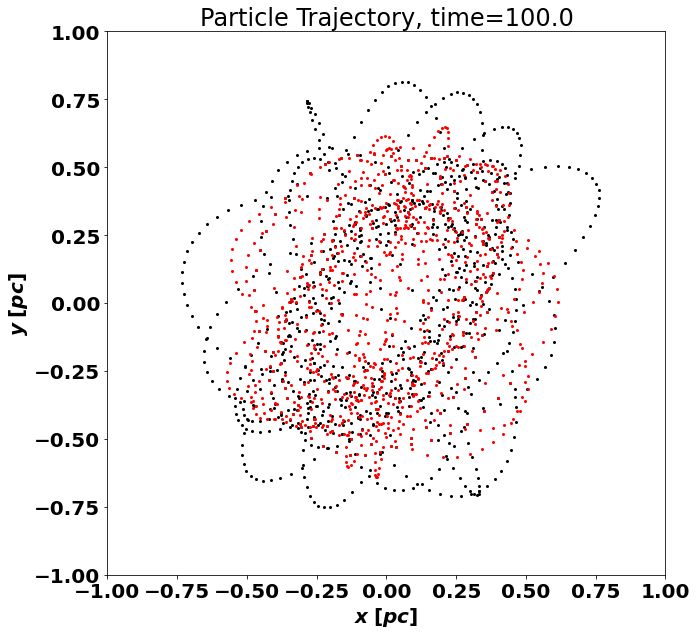

In [47]:
## 3D x-y-z plane
def update_graph(num):
    graphS.set_data(Prt_xS[num], Prt_yS[num])
    graphTrckS.set_data(Prt_xS[:num], Prt_yS[:num])
    
    graphL.set_data(Prt_xL[num],Prt_yL[num])
    graphTrckL.set_data(Prt_xL[:num], Prt_yL[:num])
    
    title.set_text('Particle Trajectory, time={}'.format(t[num]))
    return title, graphS, 

## data def
t = data_p2[0]
Prt_xS = data_p3[1]; Prt_yS = data_p3[2]
Prt_xL = data_p3[4]; Prt_yL = data_p3[5]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
title = ax.set_title('2D Test')

graphS, = ax.plot(Prt_xS[0], Prt_yS[0], linestyle="", marker="o", color='black', ms=2)
graphTrckS, = ax.plot(Prt_xS[0], Prt_yS[0], linestyle="", marker="o", color='black', ms=2)

graphL, = ax.plot( Prt_xL[0], Prt_yL[0], linestyle="", marker="o", color='red', ms=2)
graphTrckL, = ax.plot(Prt_xL[0], Prt_yL[0], linestyle="", marker="o", color='red', ms=2)
#ax.scatter(plumsphr_ic[0], plumsphr_ic[1], s=2, color='blue', alpha=0.1, marker='*')


ax.set_xlim(-1.0, 1.0)
ax.set_ylim(-1.0, 1.0)

ax.set_xlabel(r'$x\; [pc]$')
ax.set_ylabel(r'$y\; [pc]$')

#ax.set_zlim3d(-3.0, 3.0)
#ax.axis('off')
ani_2d = matplotlib.animation.FuncAnimation(fig, update_graph, 1000, interval=40, blit=True)
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani_2d.save('./Plots/traj_p3.mp4', writer=writer)

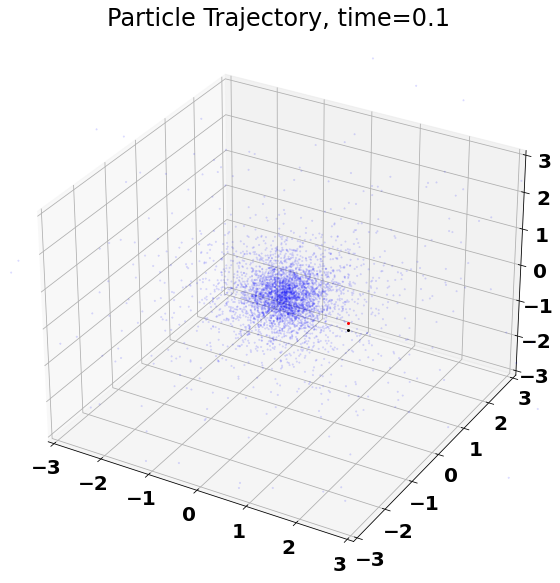

In [26]:
## 3D x-y-z plane
def update_graph(num):
    graphS.set_data(Prt_xS[num], Prt_yS[num])
    graphS.set_3d_properties(Prt_zS[num])
    
    graphTrckS.set_data(Prt_xS[:num], Prt_yS[:num])
    graphTrckS.set_3d_properties(Prt_zS[:num])
    
    
    graphL.set_data(Prt_xL[num],Prt_yL[num])
    graphL.set_3d_properties(Prt_zL[num])
    
    graphTrckL.set_data(Prt_xL[:num], Prt_yL[:num])
    graphTrckL.set_3d_properties(Prt_zL[:num])
    
    title.set_text('Particle Trajectory, time={}'.format(t[num]))
    return title, graphS, 

## data def
t = data_p2[0]
Prt_xS = data_p2[1]; Prt_yS = data_p2[2]; Prt_zS = data_p2[3]
Prt_xL = data_p2[4]; Prt_yL = data_p2[5]; Prt_zL = data_p2[6]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')

graphS, = ax.plot(Prt_xS[0], Prt_yS[0],  Prt_zS[0], linestyle="", marker="o", color='black', ms=2)
graphTrckS, = ax.plot(Prt_xS[0], Prt_yS[0],  Prt_zS[0], linestyle="", marker="o", color='black', ms=2)

graphL, = ax.plot( Prt_xL[0], Prt_yL[0],  Prt_zL[0], linestyle="", marker="o", color='red', ms=2)
graphTrckL, = ax.plot(Prt_xL[0], Prt_yL[0],  Prt_zL[0], linestyle="", marker="o", color='red', ms=2)
ax.scatter(plumsphr_ic[0], plumsphr_ic[1], plumsphr_ic[2], s=2, color='blue', alpha=0.1, marker='*')


ax.set_xlim3d(-3.0, 3.0)
ax.set_ylim3d(-3.0, 3.0)
ax.set_zlim3d(-3.0, 3.0)
#ax.axis('off')
ani = matplotlib.animation.FuncAnimation(fig, update_graph, 1000, interval=40, blit=True)

In [27]:
ani

### [Errors]

In [36]:
data = np.loadtxt('./output/PlummerSphereErrs.dat', unpack=True)

In [37]:
t = data[0]
Crd_sgm = data[1]; Vel_sgm = data[2]
E_sgm = data[3]; P_sgm = data[4]
ENL = data[5];  VIRL = data[6]
print(len(t))

1000


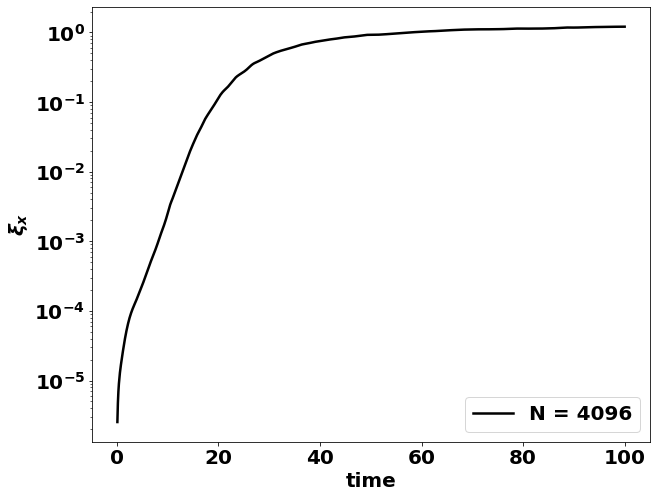

In [49]:
plt.figure(figsize=(10,8))
plt.plot(t, Crd_sgm, ls='-', lw=2.5, color='black', label='N = 4096')
#plt.plot(t, Vel_sgm, ls='--', lw=2.5, color='blue', label='Velocity')
#plt.plot(t, E_sgm, ls='-.', lw=2.5, color='green', label='Energy')
#plt.plot(t, P_sgm, ls=':', lw=2.5, color='red', label='Momentum')
plt.legend(loc='lower right', ncol=2)
plt.yscale('log')
plt.xlabel('time')
plt.ylabel(r'$\xi_{x}$')
plt.savefig('./Plots/Error_total.png')
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
#plt.plot(t, ENL, ls='--', lw=2.5, color='black')
plt.plot(t, VIRL, ls='--', lw=2.5, color='blue')
#plt.yscale('log')
plt.xlabel('time')
plt.ylabel('$E$')
plt.show()

In [ ]:
import amuse

In [ ]:
from amuse.units import units
